In [1]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.optimizers import RMSprop

/Users/kakao/.pyenv/versions/3.6.3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 5-1

In [2]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [6]:
from keras.utils import to_categorical

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

In [8]:
train_images = train_images.reshape((-1, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [9]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=64
)

Epoch 1/5
60000/60000 [==============================] - 27s 448us/step - loss: 0.1805 - acc: 0.9429
Epoch 2/5
60000/60000 [==============================] - 26s 438us/step - loss: 0.0486 - acc: 0.9848
Epoch 3/5
60000/60000 [==============================] - 26s 432us/step - loss: 0.0328 - acc: 0.9900
Epoch 4/5
60000/60000 [==============================] - 26s 430us/step - loss: 0.0258 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 26s 432us/step - loss: 0.0198 - acc: 0.9939


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 152us/step


In [13]:
test_acc

0.9917

## 5-2

In [14]:
import os, shutil

In [22]:
original_dataset_dir = './dataset/cats_and_dogs/train'

base_dir = './dataset/cats_and_dogs/small_train'
# os.mkdir(base_dir)

In [23]:
train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

In [24]:
train_cat_dir = os.path.join(train_dir, 'cat')
# os.mkdir(train_cat_dir)

train_dog_dir = os.path.join(train_dir, 'dog')
# os.mkdir(train_dog_dir)

In [25]:
validation_cat_dir = os.path.join(validation_dir, 'cat')
# os.mkdir(validation_cat_dir)

validation_dog_dir = os.path.join(validation_dir, 'dog')
# os.mkdir(validation_dog_dir)

In [26]:
test_cat_dir = os.path.join(test_dir, 'cat')
# os.mkdir(test_cat_dir)

test_dog_dir = os.path.join(test_dir, 'dog')
# os.mkdir(test_dog_dir)

In [27]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

In [28]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cat_dir, fname)
    shutil.copyfile(src, dst)

In [29]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

In [30]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

In [31]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dog_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

In [33]:
print('훈련용 고양이: ', len(os.listdir(train_cat_dir)))
print('검증용 고양이: ', len(os.listdir(validation_cat_dir)))
print('테스트용 고양이: ', len(os.listdir(test_cat_dir)))
print('훈련용 강아지: ', len(os.listdir(train_dog_dir)))
print('검증용 강아지: ', len(os.listdir(validation_dog_dir)))
print('테스트용 강아지: ', len(os.listdir(test_dog_dir)))

훈련용 고양이:  1000
검증용 고양이:  500
테스트용 고양이:  500
훈련용 강아지:  1000
검증용 강아지:  500
테스트용 강아지:  500


In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [37]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

In [38]:
from keras.preprocessing.image import ImageDataGenerator

- 사진 파일을 읽는다.
- JPEG 콘텐츠를 RGB 픽셀 값으로 디코딩한다.
- 부동 소수 타입의 텐서로 변환한다.
- 픽셀 값(0~255)의 스케일을 [0, 1] 사이로 조정합니다.

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기: ', data_batch.shape)
    print('배치 레이블 크기: ', labels_batch.shape)
    break

배치 데이터 크기:  (20, 150, 150, 3)
배치 레이블 크기:  (20,)


In [43]:
histiry = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=test_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 70s 700ms/step - loss: 0.6906 - acc: 0.5335 - val_loss: 0.6785 - val_acc: 0.5140
Epoch 2/30
100/100 [==============================] - 74s 738ms/step - loss: 0.6571 - acc: 0.6065 - val_loss: 0.6731 - val_acc: 0.5650
Epoch 3/30
100/100 [==============================] - 73s 726ms/step - loss: 0.6106 - acc: 0.6680 - val_loss: 0.6113 - val_acc: 0.6670
Epoch 4/30
100/100 [==============================] - 74s 744ms/step - loss: 0.5667 - acc: 0.7120 - val_loss: 0.6065 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 75s 748ms/step - loss: 0.5375 - acc: 0.7315 - val_loss: 0.5889 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 73s 728ms/step - loss: 0.5050 - acc: 0.7520 - val_loss: 0.5880 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 72s 717ms/step - loss: 0.4830 - acc: 0.7660 - val_loss: 0.5564 - val_acc: 0.7190
Epoch 8/30
100/100 [==============================] - 7

In [44]:
model.save('cats_and_dogs_small_1.h5')

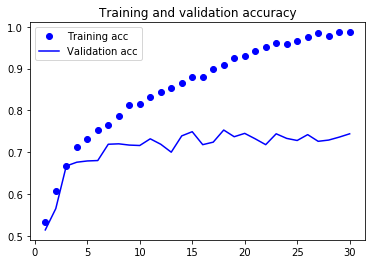

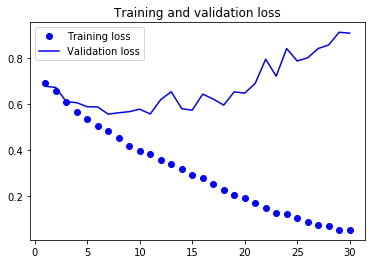

In [46]:
import matplotlib.pyplot as plt

acc = histiry.history['acc']
val_acc = histiry.history['val_acc']
loss = histiry.history['loss']
val_loss = histiry.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [47]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [48]:
from keras.preprocessing import image

In [49]:
fnames = sorted([os.path.join(train_cat_dir, fname) for fname in os.listdir(train_cat_dir)])

In [50]:
img_path = fnames[3]

In [51]:
img = image.load_img(img_path, target_size=(150, 150))

In [57]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

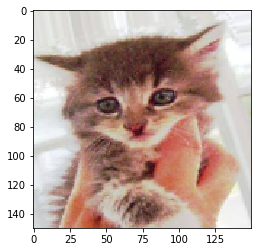

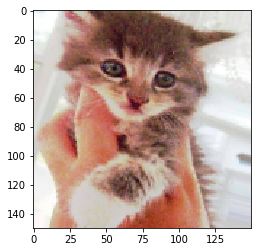

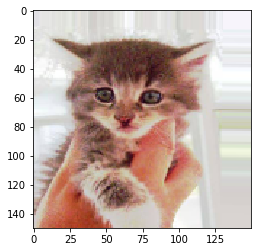

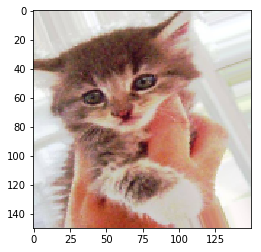

In [58]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [59]:
from keras.layers import Dropout

In [60]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

In [62]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 114s 1s/step - loss: 0.6959 - acc: 0.4978 - val_loss: 0.6799 - val_acc: 0.5980
Epoch 2/100
100/100 [==============================] - 112s 1s/step - loss: 0.6813 - acc: 0.5497 - val_loss: 0.6599 - val_acc: 0.6110
Epoch 3/100
100/100 [==============================] - 113s 1s/step - loss: 0.6682 - acc: 0.5925 - val_loss: 0.6427 - val_acc: 0.6230
Epoch 4/100
100/100 [==============================] - 113s 1s/step - loss: 0.6534 - acc: 0.6125 - val_loss: 0.6244 - val_acc: 0.6390
Epoch 5/100
100/100 [==============================] - 114s 1s/step - loss: 0.6348 - acc: 0.6319 - val_loss: 0.6101 - val_acc: 0.6630
Epoch 6/100
100/100 [==============================] - 112s 1s/step - loss: 0.6331 - acc: 0.6312 - val_loss: 0.6201 - val_acc: 0.6450
Epoch 7/100
100/100 [==============================] - 113s 1s/step - loss: 0.5949 - acc: 0.6784 - val_loss: 0.7

100/100 [==============================] - 113s 1s/step - loss: 0.4065 - acc: 0.8206 - val_loss: 0.4957 - val_acc: 0.7800
Epoch 62/100
100/100 [==============================] - 114s 1s/step - loss: 0.4183 - acc: 0.8091 - val_loss: 0.4140 - val_acc: 0.8070
Epoch 63/100
100/100 [==============================] - 113s 1s/step - loss: 0.4170 - acc: 0.8075 - val_loss: 0.4470 - val_acc: 0.7850
Epoch 64/100
100/100 [==============================] - 113s 1s/step - loss: 0.4055 - acc: 0.8203 - val_loss: 0.4302 - val_acc: 0.8010
Epoch 65/100
100/100 [==============================] - 113s 1s/step - loss: 0.4092 - acc: 0.8128 - val_loss: 0.4347 - val_acc: 0.7930
Epoch 66/100
100/100 [==============================] - 114s 1s/step - loss: 0.3879 - acc: 0.8266 - val_loss: 0.5408 - val_acc: 0.7710
Epoch 67/100
100/100 [==============================] - 114s 1s/step - loss: 0.3979 - acc: 0.8181 - val_loss: 0.4526 - val_acc: 0.7970
Epoch 68/100
100/100 [==============================] - 113s 1s/step

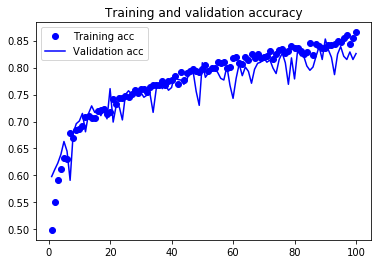

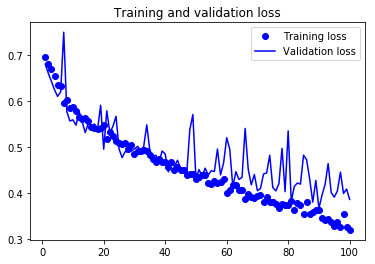

In [63]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()